In [140]:
#Problem Statement :- We are going to Predict kidney disease by using oter record

Question :- Predict Kidney disease based on health record by using ML model

Output Column=

1]ckd-Chronic Kidney Disease 

2]ckd\t-Chronic Kidney Disease 

3]notckd-Not Chronic Kidney Disease

# About Dataset
Data Set Information:

We use the following representation to collect the dataset

age - age

bp - blood pressure

sg - specific gravity

al - albumin

su - sugar

rbc - red blood cells

pc - pus cell

pcc - pus cell clumps

ba - bacteria

bgr - blood glucose random

bu - blood urea

sc - serum creatinine

sod - sodium

pot - potassium

hemo - hemoglobin

pcv - packed cell volume

wc - white blood cell count

rc - red blood cell count

htn - hypertension

dm - diabetes mellitus

cad - coronary artery disease

appet - appetite

pe - pedal edema

ane - anemia

class - class

In [141]:

#Libraries we need for runnning these Project
import pandas as pd 
import numpy as np 
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.decomposition import PCA

In [142]:
kidney_dataset=pd.read_csv('D:\Project2\Chronic_Kidney_Disease_Project\kidney_disease.csv')

In [143]:
kidney_dataset.sample(5)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
367,367,68.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,50,6700,6.1,no,no,no,good,no,no,notckd
119,119,60.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,NaN,NaN,NaN,no,no,no,good,no,no,ckd
233,233,51.0,100.0,1.015,2.0,0.0,normal,normal,notpresent,present,...,NaN,NaN,NaN,no,no,no,poor,no,no,ckd
138,138,73.0,NaN,1.010,1.0,0.0,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,no,\tno,no,good,no,no,ckd
164,164,14.0,NaN,1.015,0.0,0.0,NaN,NaN,notpresent,notpresent,...,40,9500,5.4,no,yes,no,poor,yes,no,ckd


# Understand The Data

In [144]:
kidney_dataset.shape
#No of row=400
#No of column=26 (25 independent and one dependent)

(400, 26)

In [145]:
kidney_dataset['classification'].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [146]:
#Get more info of dataset
kidney_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [147]:
#Check Null Vlaue
kidney_dataset.isnull().sum()



id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

You can see lot of null values are there in dataset but it is not possible to drop all values directoly because we already have limited ammount of data and we dont want to loose data

So we will replace value by central tendancy or use other technique to make balanced data

In [148]:
#We can replace np.Nan value by central tendancy for which we will use SimpleImputer
#Columns which only contained missing values at fit are discarded upon transform if strategy is not "constant"
mode = SimpleImputer(
    missing_values=np.NaN, 
    strategy='most_frequent'
)


df_imputer = mode.fit_transform(kidney_dataset)
df_imputer = pd.DataFrame(df_imputer)
df_imputer.columns = kidney_dataset.columns
df_imputer

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.02,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.02,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [149]:
df_imputer.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

You can see we are able to Handle Missing values without compromise dataset

In [150]:
for i in df_imputer.columns:
    print("*"*20,i,"*"*20)
    print(set(df_imputer[i]))
    print()

******************** id ********************
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212,

You can observe some column contain values like'\t' which are not part of our dataset so we have to remove them we will replece it 

In [151]:
print(df_imputer['rc'].mode()[0])
print(df_imputer['wc'].mode()[0])
print(df_imputer['pcv'].mode()[0])
print(df_imputer['rc'].mode())

5.2
9800
41
0    5.2
Name: rc, dtype: object


#### We will replace missing values also change unwanted kind data

In [152]:
#We will correct manuual error by replacing \t with appropriate charactor
df_imputer['classification'] = df_imputer['classification'].apply(lambda x : 'ckd' if x == 'ckd\t' else x)

df_imputer['cad'] = df_imputer['cad'].apply(lambda x : 'no' if x == '\tno' else x)

df_imputer['dm'] = df_imputer['dm'].apply(lambda x : 'yes' if x == '\tyes' else x)
df_imputer['dm'] = df_imputer['dm'].apply(lambda x : 'no' if x == '\tno' else x)
df_imputer['dm'] = df_imputer['dm'].apply(lambda x : 'yes' if x == ' yes' else x)

In [153]:

#We will correct manuual error by replacing \t with appropriate mode in numerical column

#For Column rc we will use 5.2
df_imputer['rc'] = df_imputer['rc'].apply(lambda x : df_imputer['rc'].mode()[0] if x == '\t?' else x)

#For Column rc we will use 41
df_imputer['pcv'] = df_imputer['pcv'].apply(lambda x : df_imputer['pcv'].mode()[0] if x == '\t43' else x)
df_imputer['pcv'] = df_imputer['pcv'].apply(lambda x : df_imputer['pcv'].mode()[0] if x == '\t?' else x)

#For Column rc we will use 9800
df_imputer['wc'] = df_imputer['wc'].apply(lambda x : '9800' if x == '\t6200' else x)
df_imputer['wc'] = df_imputer['wc'].apply(lambda x : '9800' if x == '\t?' else x)
df_imputer['wc'] = df_imputer['wc'].apply(lambda x : '9800' if x == '\t8400' else x)

In [154]:
for i in df_imputer.columns:
    print("***************", i, "*******************")
    print()
    print(set(df_imputer[i].tolist()))
    print()

*************** id *******************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213,

### Visualization

1] countplot

2] distplot / displot

3] boxplot

4] barplot

5] histplot

6]

    index  classification
0     ckd             250
1  notckd             150


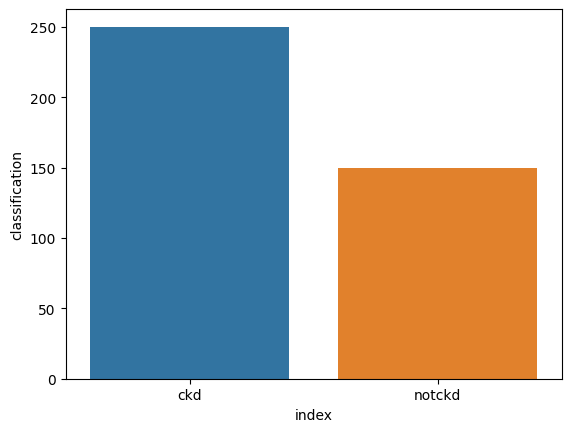

In [155]:
#Barplot :- 
classi = pd.DataFrame(df_imputer['classification'].value_counts().reset_index())
sns.barplot(x='index' , y = 'classification' ,data = classi)
print(classi)

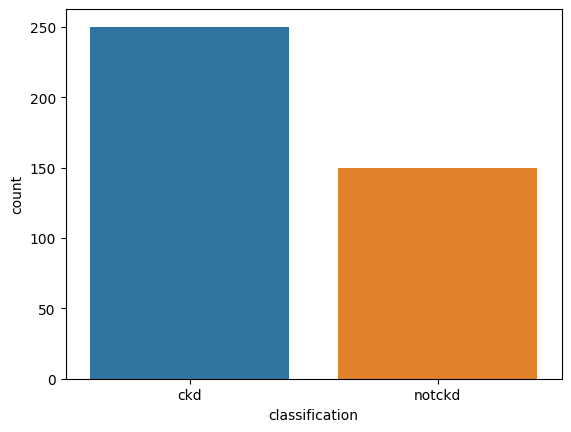

In [156]:
# Countplot :-
sns.countplot(df_imputer , x='classification')
plt.show()

### You can see Data is imbalanced so you need to handele it

In [157]:
#Origionla Dataset Datatype
kidney_dataset.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [158]:
#After using SimpleImputer converted into Object
df_imputer.dtypes

id                object
age               object
bp                object
sg                object
al                object
su                object
rbc               object
pc                object
pcc               object
ba                object
bgr               object
bu                object
sc                object
sod               object
pot               object
hemo              object
pcv               object
wc                object
rc                object
htn               object
dm                object
cad               object
appet             object
pe                object
ane               object
classification    object
dtype: object

In [159]:
#We will convert all these column into float
#Categorical Column List
kidney_dataset.select_dtypes(exclude='object').columns.to_list()

['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']

In [160]:
# for i in kidney_dataset.select_dtypes(exclude='object').columns:
#     df_imputer[i]=df_imputer[i].astype('float')


for i in kidney_dataset.select_dtypes(exclude='object').columns:
    df_imputer[i]=df_imputer[i].apply(lambda x : float(x))

In [161]:
df_imputer['id'].dtype

dtype('float64')

In [162]:
#You will get distribution of data by using pairplot
# sns.pairplot(df_imputer)

C:\Users\pramod.khavare\AppData\Local\Temp\ipykernel_1108\1411536071.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_imputer[column_name])


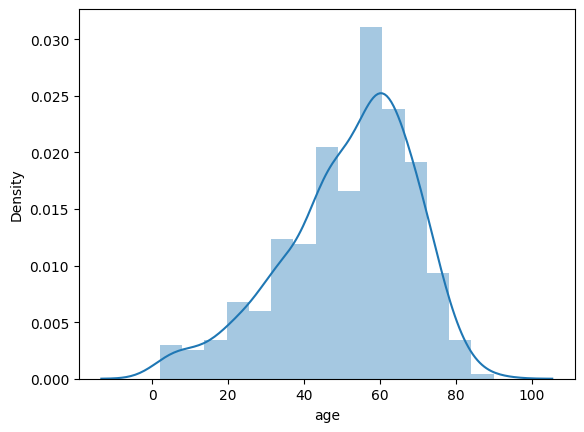

C:\Users\pramod.khavare\AppData\Local\Temp\ipykernel_1108\1411536071.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_imputer[column_name])


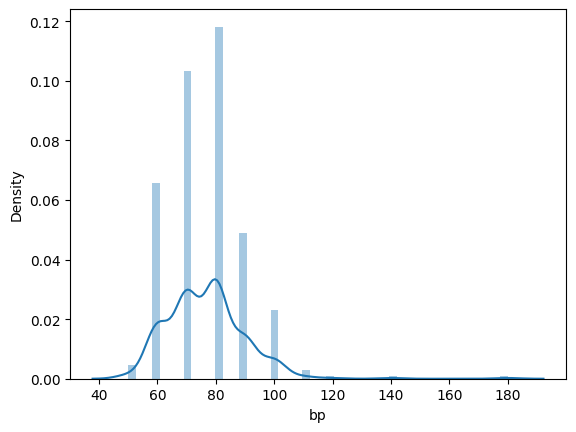

C:\Users\pramod.khavare\AppData\Local\Temp\ipykernel_1108\1411536071.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_imputer[column_name])


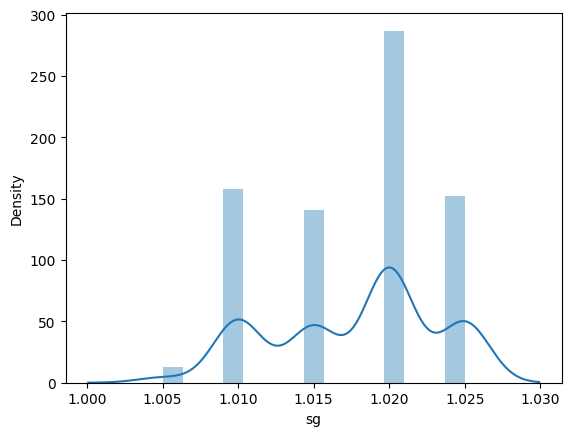

C:\Users\pramod.khavare\AppData\Local\Temp\ipykernel_1108\1411536071.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_imputer[column_name])


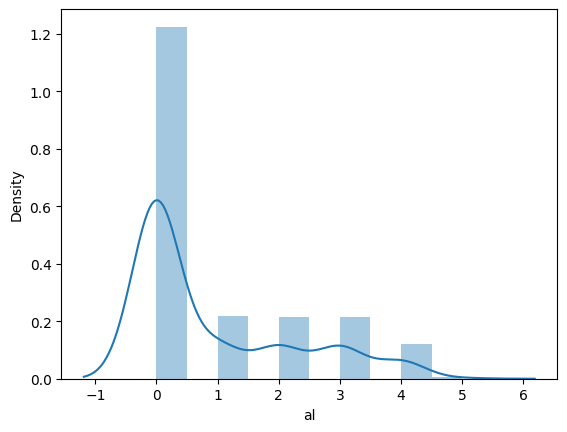

C:\Users\pramod.khavare\AppData\Local\Temp\ipykernel_1108\1411536071.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_imputer[column_name])


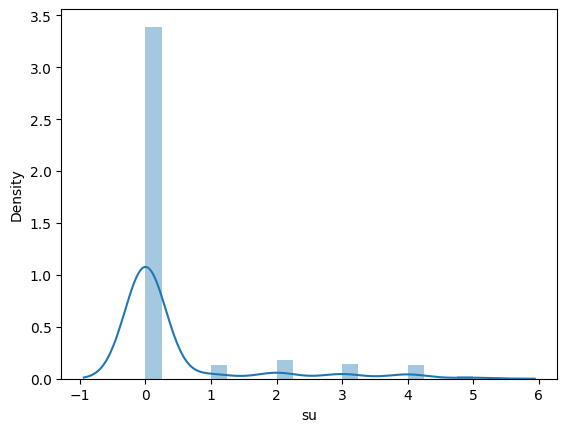

C:\Users\pramod.khavare\AppData\Local\Temp\ipykernel_1108\1411536071.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_imputer[column_name])


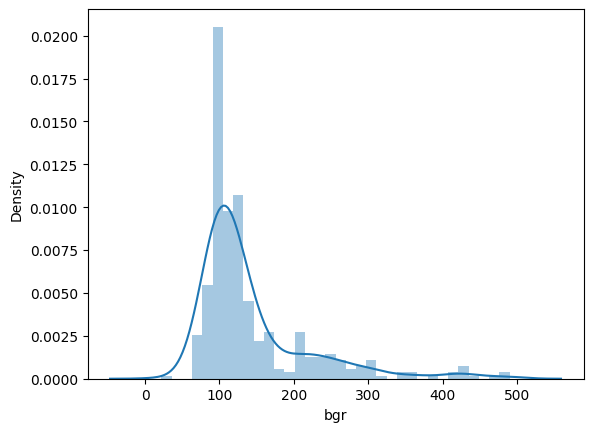

C:\Users\pramod.khavare\AppData\Local\Temp\ipykernel_1108\1411536071.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_imputer[column_name])


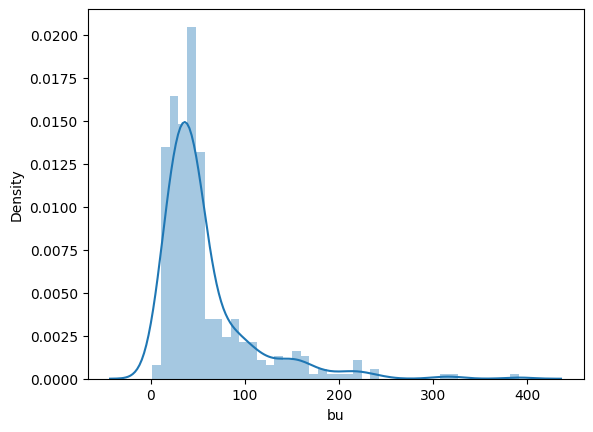

C:\Users\pramod.khavare\AppData\Local\Temp\ipykernel_1108\1411536071.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_imputer[column_name])


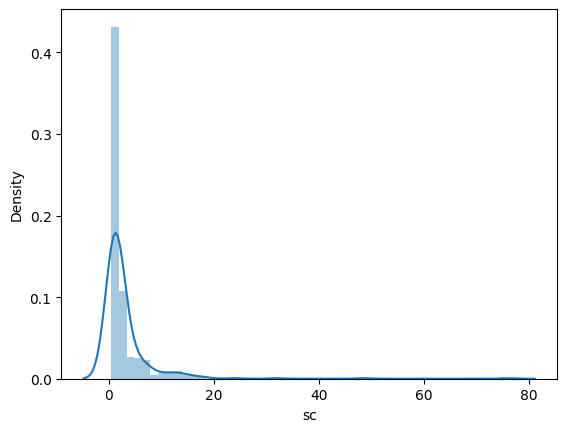

C:\Users\pramod.khavare\AppData\Local\Temp\ipykernel_1108\1411536071.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_imputer[column_name])


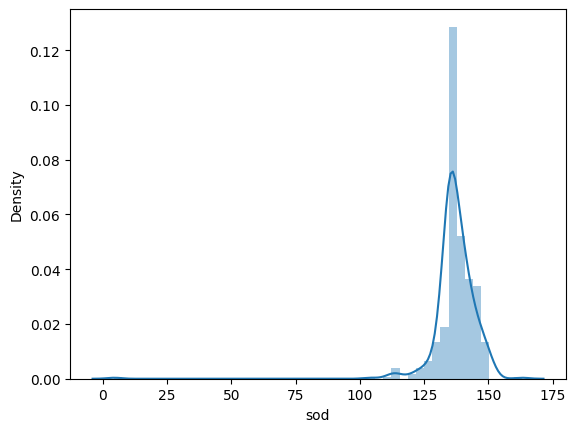

C:\Users\pramod.khavare\AppData\Local\Temp\ipykernel_1108\1411536071.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_imputer[column_name])


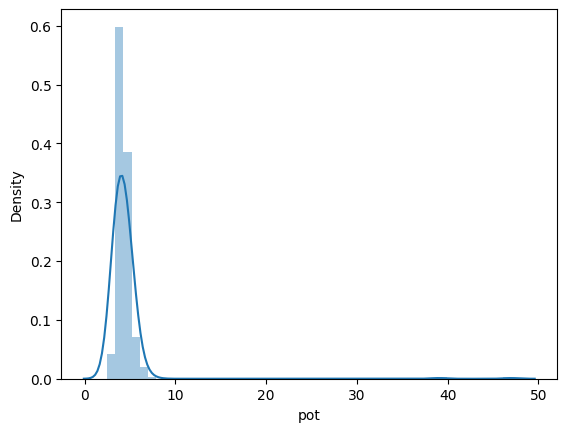

C:\Users\pramod.khavare\AppData\Local\Temp\ipykernel_1108\1411536071.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_imputer[column_name])


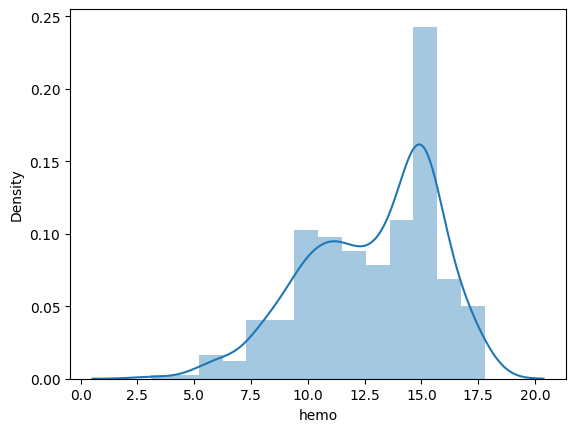

In [163]:
def distplot(column_name):
    sns.distplot(df_imputer[column_name])
    plt.show()
    
for i in df_imputer.select_dtypes(exclude='object').columns[1:]:
    distplot(i)
    


In [164]:
df_imputer.skew()

C:\Users\pramod.khavare\AppData\Local\Temp\ipykernel_1108\3254265.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_imputer.skew()


id       0.000000
age     -0.701364
bp       1.601858
sg      -0.333320
al       1.180088
su       2.700055
bgr      2.186360
bu       2.721484
sc       7.662273
sod     -7.576113
pot     12.827537
hemo    -0.570052
pcv     -0.604802
wc       1.333196
rc      -0.704822
dtype: float64

##### We will decide skewness inside data 
##### Cond1:- <-1 or >1 :Skewd Data you need to precess 


##### You Can see almost all numerical column distribution is normal.So we can procede further .If you expect more accuracy from model in future you can apply few technique to reduce skewness

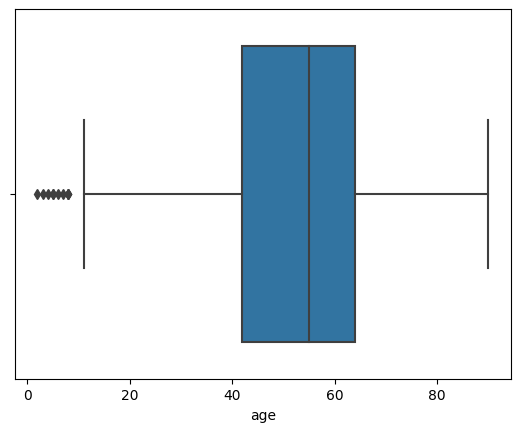

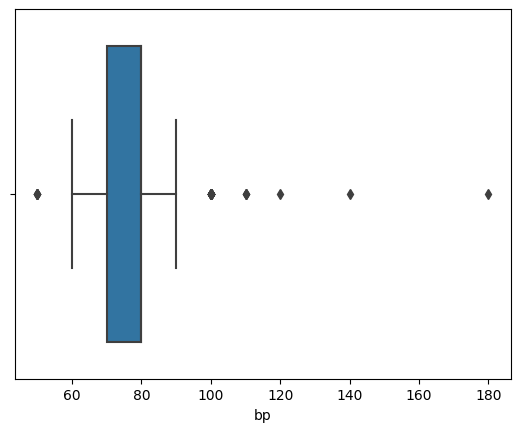

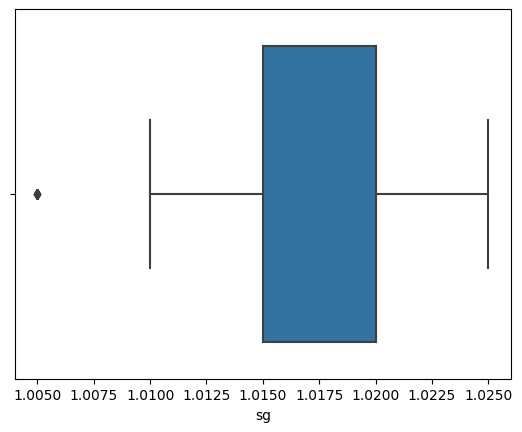

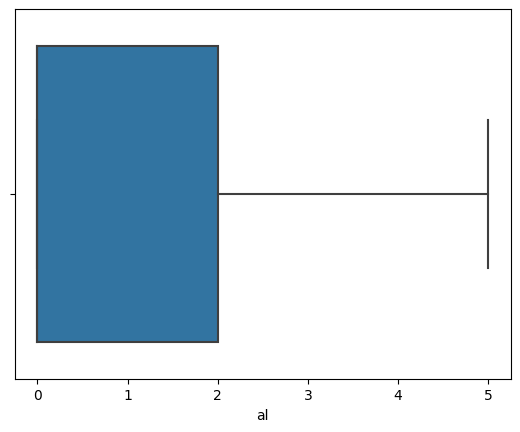

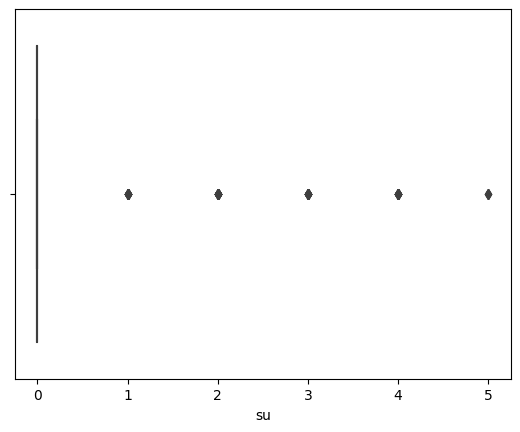

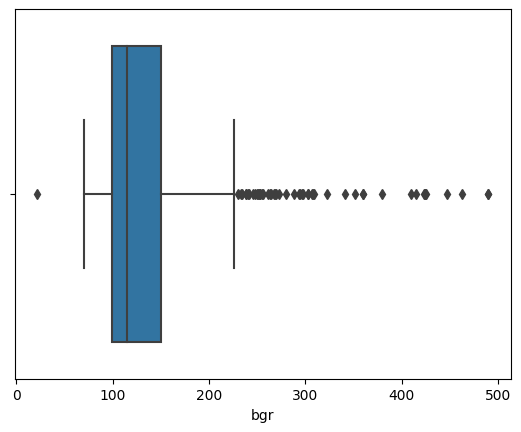

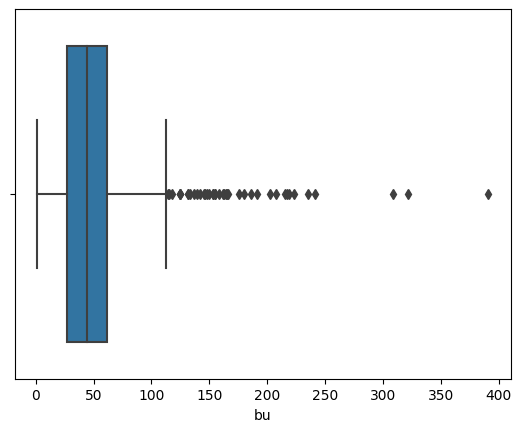

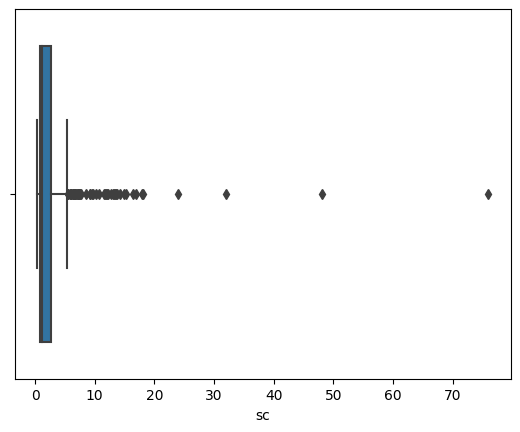

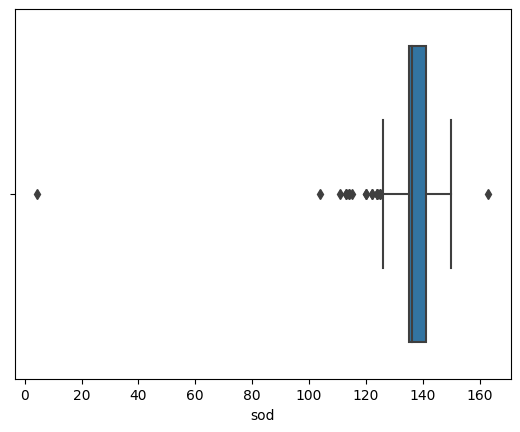

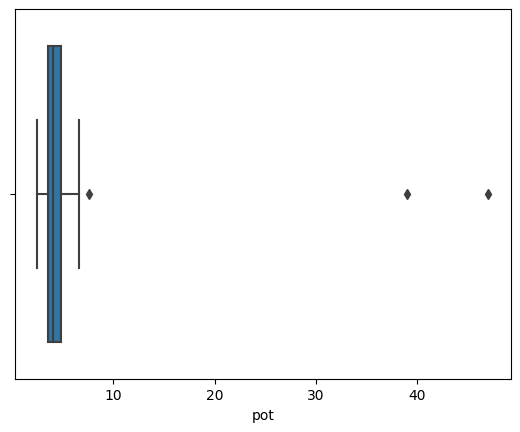

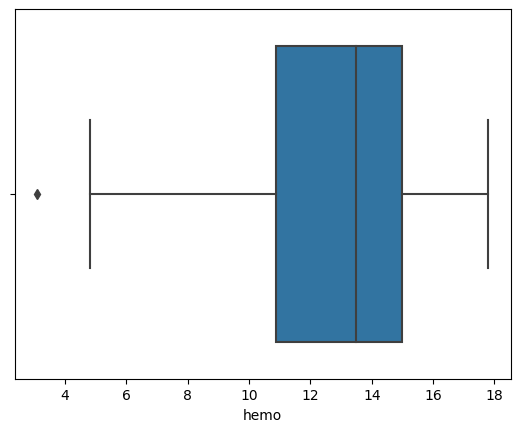

In [165]:
#Detect Outlier and remover them
def boxp(column_name):
    """Function will useful to visualize outlier"""
    sns.boxplot(x = df_imputer[column_name])
    plt.show()
    
for i in df_imputer.select_dtypes(exclude = 'object').columns[1:]:
    boxp(column_name = i)

In [166]:
#We will handel outlier if we want to increase accuracy(iqr will used for that)

In [167]:
df_imputer.select_dtypes(include= 'object')

,rbc,pc,pcc,ba,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,normal,normal,notpresent,notpresent,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,normal,normal,notpresent,notpresent,38,6000,5.2,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,47,6700,4.9,no,no,no,good,no,no,notckd
396,normal,normal,notpresent,notpresent,54,7800,6.2,no,no,no,good,no,no,notckd
397,normal,normal,notpresent,notpresent,49,6600,5.4,no,no,no,good,no,no,notckd
398,normal,normal,notpresent,notpresent,51,7200,5.9,no,no,no,good,no,no,notckd


### WE will convert categorical data into numerical data 
### We will use labelencoder for that

In [120]:
# Label Encoding On Multiple column
encoder = preprocessing.LabelEncoder()
df_imputer=df_imputer.apply(encoder.fit_transform)
df_imputer


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,40,3,3,1,0,1,1,0,0,...,30,69,33,1,1,0,0,0,0,0
1,1,5,0,3,4,0,1,1,0,0,...,24,53,33,0,0,0,0,0,0,0
2,2,54,3,1,2,3,1,1,0,0,...,17,67,33,0,1,0,1,0,1,0
3,3,40,2,0,4,0,1,0,1,0,...,18,59,18,1,0,0,1,1,1,0
4,4,43,3,1,2,0,1,1,0,0,...,21,65,26,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,47,3,3,0,0,1,1,0,0,...,33,59,29,0,0,0,0,0,0,1
396,396,34,2,4,0,0,1,1,0,0,...,40,69,43,0,0,0,0,0,0,1
397,397,8,3,3,0,0,1,1,0,0,...,35,58,35,0,0,0,0,0,0,1
398,398,11,1,4,0,0,1,1,0,0,...,37,64,40,0,0,0,0,0,0,1


Save these encoded data into another csv file

In [121]:
df_imputer.to_csv('final_preprocessing_data.csv')

##### Check correlation in column in Dataset and plot relationship :-
##### We can drop Column with high correlation 


<Axes: >

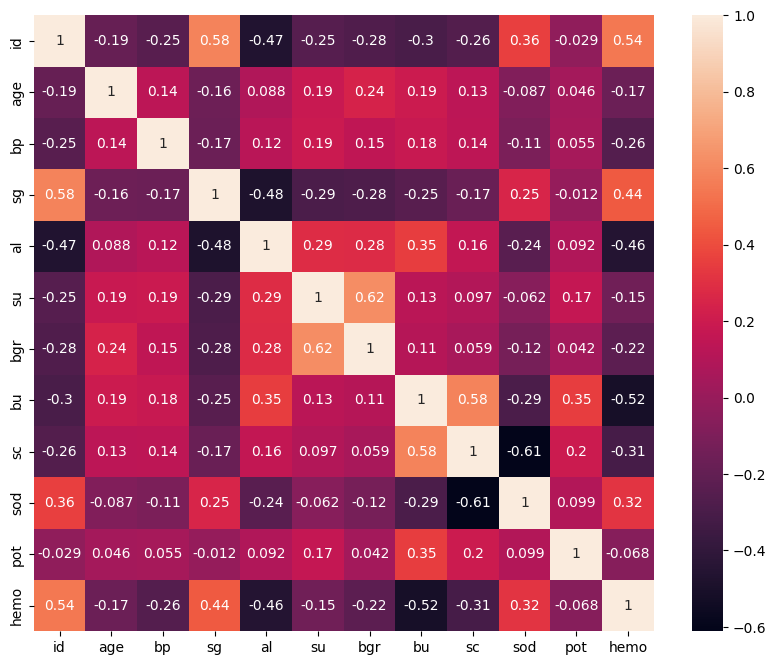

In [168]:
corr=df_imputer.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True)

In [123]:
X = df_imputer.drop(columns=['id','classification'])
y = df_imputer['classification']

Handle imbalanced data

We will use Random Oversampling and Undersampling

In [124]:
print(Counter(y))

Counter({0: 250, 1: 150})


In [125]:
ros = RandomOverSampler()
x_ros , y_ros =ros.fit_resample(X,y)
print(Counter(y_ros))
y=y_ros


Counter({0: 250, 1: 250})


In [126]:
scalar=preprocessing.MinMaxScaler((-1 , 1))
x = scalar.fit_transform(x_ros)


#PCA :- Used to reduce dimension , It help to reduce column by selcting random column and reduce unwanted column

In [127]:
#0.95% data will select
pca=PCA(0.95)
X_PCA=pca.fit_transform(x)

In [128]:
print(x.shape)
print(X_PCA.shape)
print(y.shape)

(500, 24)
(500, 18)
(500,)


In [129]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_PCA , y , test_size = 0.2 ,random_state=121)
x_train.shape[1]

18

## Create Neural Network:-

In [130]:
import keras
from keras.models import Sequential ,Model
from keras.layers import Dense ,Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam 
from sklearn.model_selection import KFold


In [172]:
def model():
    classifier =Sequential()
    classifier.add(Dense(15 ,input_shape = (x_train.shape[1],) ,activation='relu'))
    classifier.add(Dropout(0.2))
    
    classifier.add(Dense(15 ,activation = 'relu'))
    classifier.add(Dropout(0.4))
    
    classifier.add(Dense(1,activation = 'sigmoid'))
    
    classifier.compile(optimizer = 'adam' ,loss='binary_crossentropy' ,metrics=['accuracy'])
    
    return classifier

In [173]:
model = model()


In [174]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 15)                285       
                                                                 
 dropout_2 (Dropout)         (None, 15)                0         
                                                                 
 dense_4 (Dense)             (None, 15)                240       
                                                                 
 dropout_3 (Dropout)         (None, 15)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 16        
                                                                 
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


In [134]:
history =model.fit(x_train ,y_train ,validation_data=(x_test ,y_test) ,epochs=20 ,verbose=1)

Epoch 1/20
13/13 [==============================] - 2s 35ms/step - loss: 0.8320 - accuracy: 0.3575 - val_loss: 0.7561 - val_accuracy: 0.3000
Epoch 2/20
13/13 [==============================] - 0s 9ms/step - loss: 0.7530 - accuracy: 0.4675 - val_loss: 0.6985 - val_accuracy: 0.5500
Epoch 3/20
13/13 [==============================] - 0s 12ms/step - loss: 0.7006 - accuracy: 0.5275 - val_loss: 0.6492 - val_accuracy: 0.8400
Epoch 4/20
13/13 [==============================] - 0s 10ms/step - loss: 0.6533 - accuracy: 0.5950 - val_loss: 0.6013 - val_accuracy: 0.9400
Epoch 5/20
13/13 [==============================] - 0s 9ms/step - loss: 0.6192 - accuracy: 0.7075 - val_loss: 0.5557 - val_accuracy: 0.9600
Epoch 6/20
13/13 [==============================] - 0s 11ms/step - loss: 0.5854 - accuracy: 0.7400 - val_loss: 0.5118 - val_accuracy: 0.9600
Epoch 7/20
13/13 [==============================] - 0s 8ms/step - loss: 0.5319 - accuracy: 0.8125 - val_loss: 0.4660 - val_accuracy: 0.9800
Epoch 8/20
13/13

In [135]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_recall_curve, average_precision_score, f1_score, confusion_matrix